In [1]:
 import numpy as np
 import pandas as pd

In [2]:
dataset=pd.read_csv('/content/kaggle_movie_train.csv')

In [3]:
dataset.head()

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama


In [5]:
dataset.isna().sum()

id       0
text     0
genre    0
dtype: int64

In [6]:
dataset['genre'].unique()

array(['thriller', 'comedy', 'drama', 'action', 'sci-fi', 'other',
       'romance', 'horror', 'adventure'], dtype=object)

In [7]:
encode_genre={'thriller':0 ,'comedy':1 ,'drama':2 ,'action':3 ,'sci-fi':4 ,'other':5 ,'romance':6 ,'horror':7 ,'adventure':8}

In [8]:
dataset['genre'] =dataset['genre'].map(encode_genre)

In [9]:
dataset.head()

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",0
1,2,"t, summa cum laude and all. And I'm about to l...",1
2,3,"up Come, I have a surprise.... She takes him ...",2
3,4,ded by the two detectives. INT. JEFF'S APARTME...,0
4,5,"nd dismounts, just as the other children reach...",2


In [10]:
import re
import nltk

In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [13]:
corpus=[]

In [14]:
dataset['text'][0]

"eady dead, maybe even wishing he was. INT. 2ND FLOOR HALLWAY THREE NIGHT The Orderly leads Liza to a door. ORDERLY In here. White guy in his 30s. He opens the door and they step into... ROOM THREE There's a white guy in his mid 30s. He looks up. Wild. Straight jacketed. Not Jerry. Liza's reached the end of her rope. She just shakes her head. INT. DECREPIT HOSPITAL ROOM NIGHT Balled up. Fetal. Not really all there. Head pressed to the cement, he tries to sing to himself. JERRY Blue moon... Blue moon... INT. 2ND FLOOR HALLWAY THREE NIGHT Liza just stands there, leaning on a rail on the wall. The Orderly isn't sure what's going on, but he knows it's bad. ORDERLY You okay? Liza starts down the hall with the Orderly following. ORDERLY We got some new patients last week. You want to see them? Liza waves them off. It's hopeless. She stops at a chicken wired window at the end of the hall, looks out. Light's about to break and Jerry's out there somewhere. ORDERLY Look, I gotta get back to work

In [15]:
re.sub(pattern='[^a-zA-Z]',repl='',string=dataset['text'][0]).lower()

'eadydeadmaybeevenwishinghewasintndfloorhallwaythreenighttheorderlyleadslizatoadoororderlyinherewhiteguyinhissheopensthedoorandtheystepintoroomthreetheresawhiteguyinhismidshelooksupwildstraightjacketednotjerrylizasreachedtheendofherropeshejustshakesherheadintdecrepithospitalroomnightballedupfetalnotreallyallthereheadpressedtothecementhetriestosingtohimselfjerrybluemoonbluemoonintndfloorhallwaythreenightlizajuststandsthereleaningonarailonthewalltheorderlyisntsurewhatsgoingonbutheknowsitsbadorderlyyouokaylizastartsdownthehallwiththeorderlyfollowingorderlywegotsomenewpatientslastweekyouwanttoseethemlizawavesthemoffitshopelessshestopsatachickenwiredwindowattheendofthehalllooksoutlightsabouttobreakandjerrysouttheresomewhereorderlylookigottagetbacktowork'

In [23]:
for i in range(0,dataset.shape[0]):
  text = re.sub(pattern='[^a-zA-Z]' , repl='',string=dataset['text'][i])
  text = text.lower()
  words = text.split()
  cleaned_words = [word for word in words if word not in set(stopwords.words('english'))]
  ps = PorterStemmer()
  stemmed_words = [ps.stem(word) for word in cleaned_words]
  text = ''.join(words)
  corpus.append(text)


In [24]:
corpus[0]

'eadydeadmaybeevenwishinghewasintndfloorhallwaythreenighttheorderlyleadslizatoadoororderlyinherewhiteguyinhissheopensthedoorandtheystepintoroomthreetheresawhiteguyinhismidshelooksupwildstraightjacketednotjerrylizasreachedtheendofherropeshejustshakesherheadintdecrepithospitalroomnightballedupfetalnotreallyallthereheadpressedtothecementhetriestosingtohimselfjerrybluemoonbluemoonintndfloorhallwaythreenightlizajuststandsthereleaningonarailonthewalltheorderlyisntsurewhatsgoingonbutheknowsitsbadorderlyyouokaylizastartsdownthehallwiththeorderlyfollowingorderlywegotsomenewpatientslastweekyouwanttoseethemlizawavesthemoffitshopelessshestopsatachickenwiredwindowattheendofthehalllooksoutlightsabouttobreakandjerrysouttheresomewhereorderlylookigottagetbacktowork'

In [27]:
#creating the bag of words model

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features= 10000 , ngram_range= (1 , 2))
X = cv.fit_transform(corpus).toarray()
y = dataset['genre'].values

In [28]:
#splitting the model in to training set and test set
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2, random_state = 0)

In [29]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha = 0.1)
classifier.fit(X_train ,y_train)

MultinomialNB(alpha=0.1)

In [30]:
y_pred = classifier.predict(X_test)
y_pred

array([2, 2, 2, ..., 2, 2, 2])

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_pred)
cm

array([[   0,    0, 1318,    0,    0,    0,    0,    0,    0],
       [   0,    0,  559,    0,    0,    0,    0,    0,    0],
       [   0,    0, 1827,    0,    0,    0,    0,    0,    0],
       [   0,    0,  476,    0,    0,    0,    0,    0,    0],
       [   0,    0,  132,    0,    0,    0,    0,    0,    0],
       [   0,    0,   66,    0,    0,    0,    0,    0,    0],
       [   0,    0,   11,    0,    0,    0,    0,    0,    0],
       [   0,    0,   82,    0,    0,    0,    0,    0,    0],
       [   0,    0,   45,    0,    0,    0,    0,    0,    0]])

<Axes: >

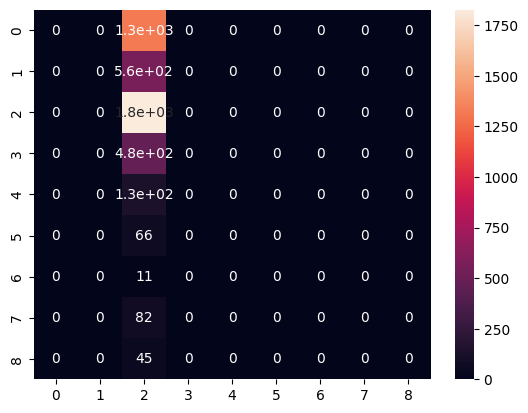

In [34]:
import seaborn as sns
sns.heatmap(cm , annot=True)

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_pred)


0.4045615589016829

In [36]:
#saving the bag of word model and classifier model
import pickle

In [37]:
pickle.dump(classifier , open('model.pkl','wb'))